In [1]:
# imports utilizados na produção desse CodeGUIDE
import pandas as pd # gerenciamento de tabelas
import matplotlib.pyplot as plt # gráficos
import seaborn as sns # gráficos
import statsmodels.api as sm # modelos estatísticos

In [2]:
# carregando dataset
path = "C:\LUCCA\Codigos VSCode\Vscode\DSA ARCHIVES\Cap14 analise estatistica com statsmodels\dataset.csv"
df_dsa = pd.read_csv(path)

In [3]:
# P.S: TUDO COMEÇA COM O PROBLEMA DE NEGÓCIO.
# tudo que eu fizer a partir de agora, 
# vai ser em função do problema de negócio.

# Problema em questão:
# Existe alguma relação entre a área de imóveis (em m^2) 
# e o valor do aluguel em uma determinada cidade?
# Caso exista relação, como podemos mensurá-la?

# Resumo:
# Analisar alguma relação entre área do imóvel e o aluguel dela.

In [4]:
# Olhando pela primeira vez o dataset:
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [5]:
# Gerando informações cruciais do dataset:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [7]:
# ANÁLISE EXPLORATÓRIA - Resumo estatístico

# valores ausentes
df_dsa.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [6]:
# Gerando resumo estatístico do dataset:
df_dsa.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [ ]:
# depois de analisar que temos alguns valores que não precisam de cálculos estatísticos,
# então devemos fazer ter no=ção do tipo de variável antes de analisar as tabelas.

In [9]:
# gerando resumo estatístico da variável alvo com base no problema de negócio.
df_dsa["valor_aluguel"].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

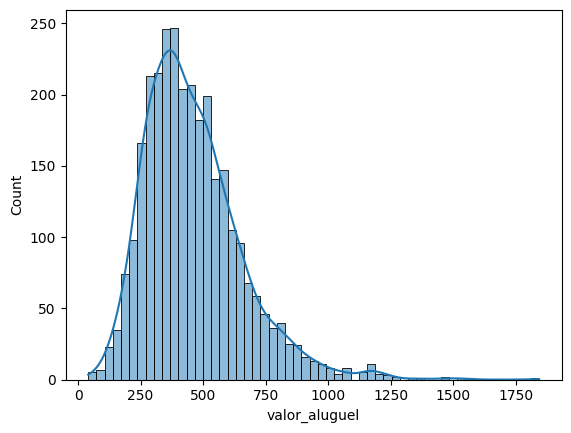

In [16]:
# histograma da varíavel alvo
sns.histplot(data = df_dsa, x="valor_aluguel", kde=True)

In [18]:
# Correlação entre variáveis
df_dsa.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

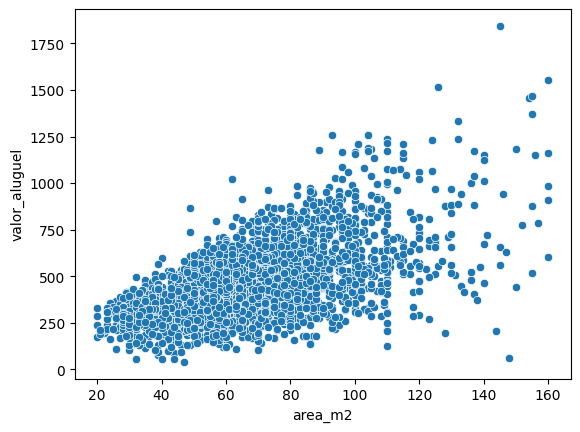

In [17]:
# histograma entre a variável de entrada e a variavel explicativa
sns.scatterplot(data = df_dsa, x="area_m2", y="valor_aluguel")

A Regressão Linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (também chamada de variável resposta ou variável alvo) e uma ou mais variáveis independentes (também chamadas de variáveis explicativas ou preditoras). 

A Regressão Linear tem como objetivo estimar os coeficientes da equação que melhor descreve essa relação, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.

Existem dois tipos principais de regressão linear:

**Regressão Linear Simples**: Neste caso, há apenas uma variável independente envolvida. A equação da Regressão Linear Simples é expressa como:

Y = a + bX + ε

Onde Y é a variável dependente, X é a variável independente, a é o coeficiente linear (intercepto), b é o coeficiente angular (inclinação) e ε é o erro aleatório.

**Regressão Linear Múltipla**: Neste caso, há duas ou mais variáveis independentes envolvidas. A equação é expressa como:

Y = a + b1X1 + b2X2 + ... + bnXn + ε

Onde Y é a variável dependente, X1, X2, ..., Xn são as variáveis independentes, a é o coeficiente linear (intercepto), b1, b2, ..., bn são os coeficientes angulares (inclinações) e ε é o erro aleatório.

A Regressão Linear é amplamente utilizada em diversas áreas, como economia, ciências sociais, biologia e engenharia, para prever resultados, avaliar relações causais e identificar fatores que contribuem para um fenômeno específico. 

Além disso, é uma técnica fundamental para a análise de dados e aprendizado de máquina, onde é usada para desenvolver modelos preditivos.

In [ ]:
# Criando o modelo

In [19]:
# definir variavel dependente (Variavel de saida)
y = df_dsa["valor_aluguel"]

In [22]:
# definir variavel indepentende (Variável de entrada)
X = df_dsa["area_m2"]

In [23]:
# adição de constante a variavel independente (REQUERIDO PELO STATSMODELS)
X = sm.add_constant(X)

In [25]:
# Criacao do modelo
modelo = sm.OLS(y,X)

In [26]:
# Treinamento do modelo
resultado = modelo.fit()

In [27]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Wed, 22 May 2024   Prob (F-statistic):          6.84e-275
Time:                        16:43:41   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

In [28]:
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


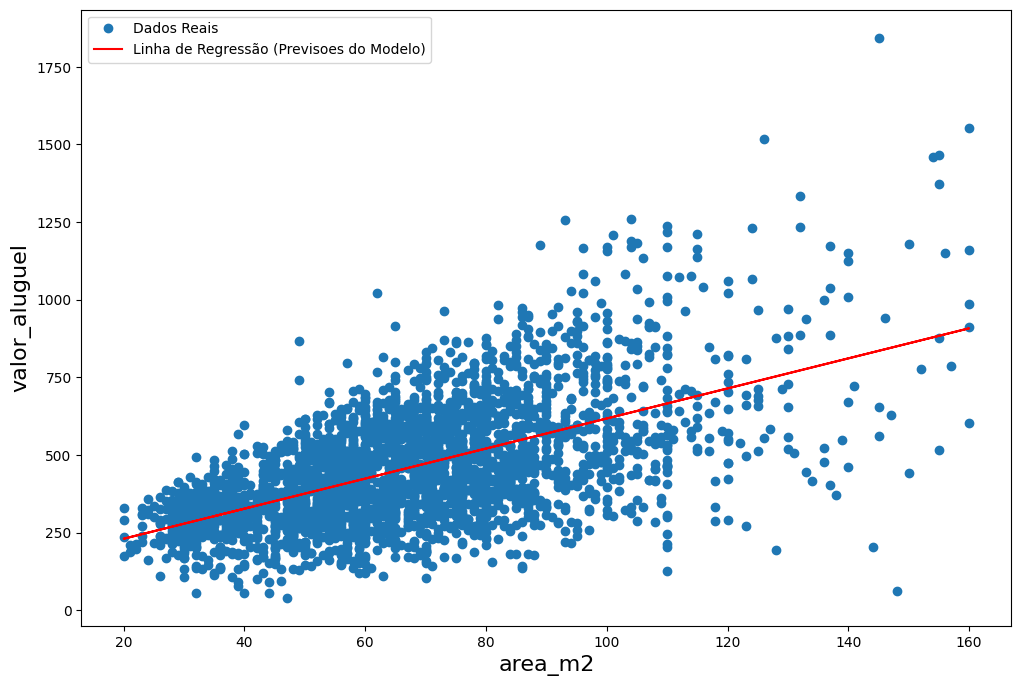

In [35]:
# plot
plt.figure(figsize= (12,8))
plt.xlabel("area_m2", size=16)
plt.ylabel("valor_aluguel", size = 16)
plt.plot(X["area_m2"], y, "o", label= "Dados Reais")
plt.plot(X["area_m2"], resultado.fittedvalues, "r-", label="Linha de Regressão (Previsoes do Modelo)")
plt.legend(loc="best")
plt.show()